In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
#import seaborn as sns
% matplotlib inline

In [2]:
desktop = "c:/users/geoffrey/desktop"
os.chdir(desktop)
tickers= ['WP','PYPl',"SQ","GDOT","MA","V","GPN","WU"]
data={}
for ticker in tickers:
    df=pd.read_csv(ticker+".csv", parse_dates=[0]).drop(['Open','Low','Close','Adj Close','Volume'], axis=1)
    data[ticker]=df


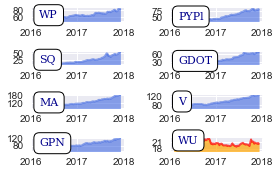

In [3]:
#colors from paletton.com base color 51A6F9 
font_dict = {'family': 'serif',
             'color': 'darkblue',
             'size': 9}
bbox_props = dict(boxstyle='round,pad=0.5', fc='w', ec='#0C7DEA', lw=1)
count=0
#fig.clf()
fig, axes = plt.subplots(4,2,sharex=True, figsize=(4,2.5))
plt.style.use('seaborn')

plotnumber = 421
for k, df in data.items():
    ax = plt.subplot(plotnumber)
    x, y = df.Date.dt.to_pydatetime(), df.High
    
    if k == "WU": color, linecolor, alpha = 'orange', 'red', 0.7
    else: color, linecolor, alpha = 'royalblue', 'royalblue' , 0.6
        
    plt.fill_between(x, y, color=color, alpha=alpha)
    plt.plot_date(x, y, '-', linewidth=2, color=linecolor,
                      alpha=alpha, label=k)
    plt.ylim([y.min() * .9, y.max() * 1.01])
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    ax.xaxis.set_major_locator(mticker.MaxNLocator(nbins=2))
    ax.yaxis.set_major_locator(mticker.MaxNLocator(nbins=2))

    font_dict = {'family': 'serif',
                 'color': 'darkblue',
                          'size':11}
    bbox_props = dict(boxstyle='round,pad=0.5', fc='w', ec='k', lw=1)
    # boxstyle syntax looks wrong but isn't a typo.

    ax.text(x[5], y[5], s=k,
            fontdict=font_dict,
            bbox = bbox_props)  # custom designed dictionary, below
    plotnumber += 1

fig.tight_layout()

In [4]:
count=0
for k, df in data.items():
    x, y = df.Date.dt.to_pydatetime(), df.High
    if k == "WU": #red
        color, linecolor, alpha = 'orange','red', 0.6
    else: #blues
        color, linecolor, alpha = "#A9D3FC", "#2A91F5", .6
    ax=axes.flat[count]
    ax.fill_between(x,y, color=color, alpha=alpha)
    ax.plot_date(x,y,'-',lw=1.5,color=linecolor,alpha=alpha,label=k)
    ax.set_ylim([y.min() * .95, y.max() * 1.01])
    ax.set_xlim( [x[0],x[-1]])
    #ax.set_yscale("log")
    ax.yaxis.set_visible(False)
    count+=1
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    ax.xaxis.set_major_locator(mticker.MaxNLocator(nbins=3))
    ax.yaxis.set_major_locator(mticker.MaxNLocator(1))
    ax.text(x[15], 0.5 * (y.max() + y.min()), s=k,
            fontdict=font_dict,
            bbox=bbox_props) 
    [(x.set_color("#51A6F9"), x.set_linewidth(1)) for x in ax.spines.values()]
    plt.setp(ax.get_xticklabels(),fontsize=5)
fig.tight_layout()
fig.subplots_adjust(hspace=0.1)